In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

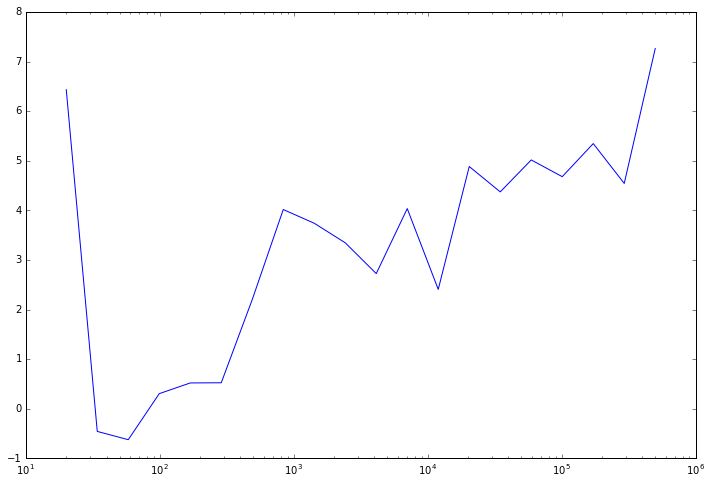

In [7]:
t,o = EPR(r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x61 y134 T1 3600 sec *[0-9]',
   r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x61 y134 T1 3600 sec  Pulse Seq')

plt.semilogx(t,o)

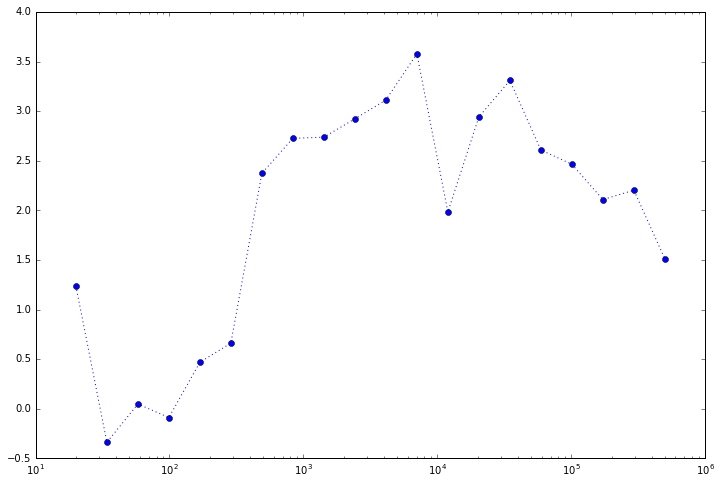

In [8]:
t,o = EPR(r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x28 y103 T1 3600 sec *[0-9]',
   r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x28 y103 T1 3600 sec  Pulse Seq')

plt.semilogx(t,o,'bo:')

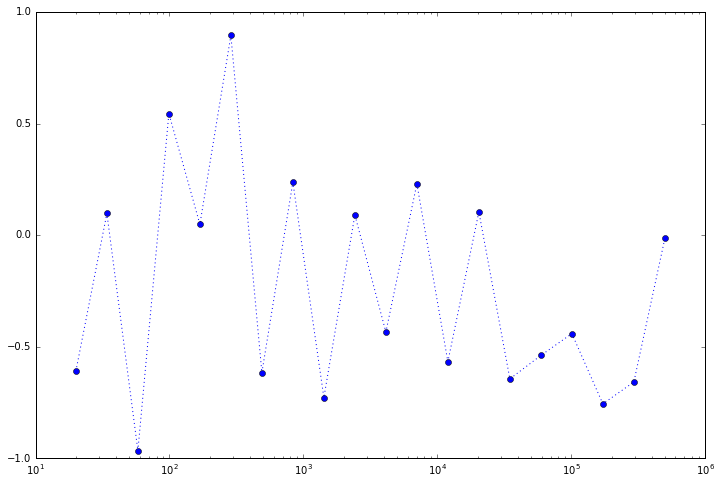

In [9]:
t,o = EPR(r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x38 y130 T1 3600 sec *[0-9]',
   r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x38 y130 T1 3600 sec  Pulse Seq')

plt.semilogx(t,o,'bo:')

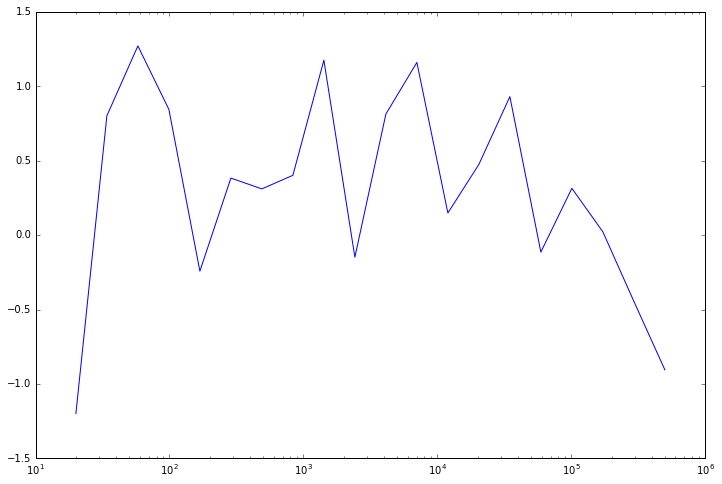

In [10]:
t,o = EPR(r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x55 y97 T1 3600 sec *[0-9]',
   r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x55 y97 T1 3600 sec  Pulse Seq')

plt.semilogx(t,o)

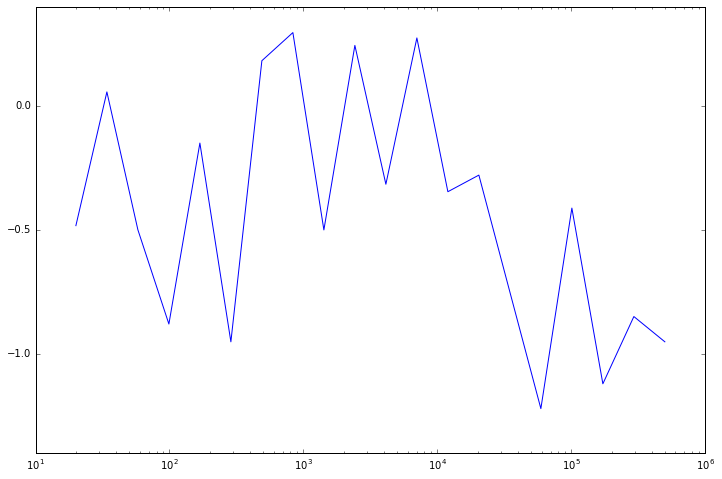

In [11]:
t,o = EPR(r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x145 y109 T1 3600 sec *[0-9]',
   r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x145 y109 T1 3600 sec  Pulse Seq')

plt.semilogx(t,o)

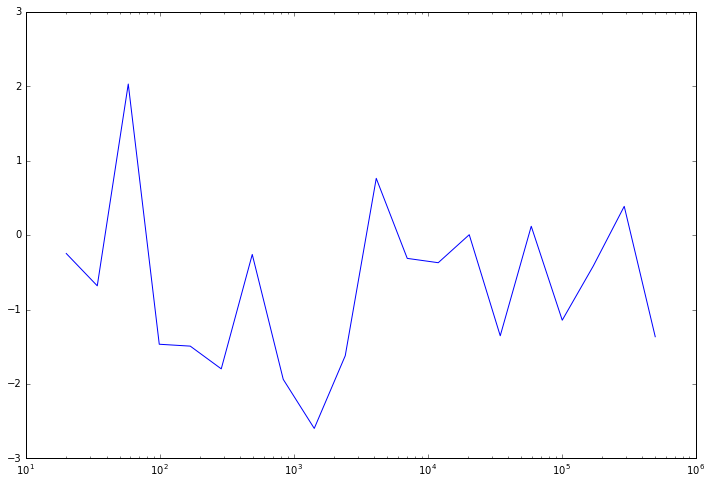

In [12]:
t,o = EPR(r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x106 y122 T1 3600 sec *[0-9]',
   r'C:\Users\Ouyang Group\Documents\Data\6-16-16\5mW Nabond on CPW scan 4 T1 x106 y122 T1 3600 sec  Pulse Seq')

plt.semilogx(t,o)

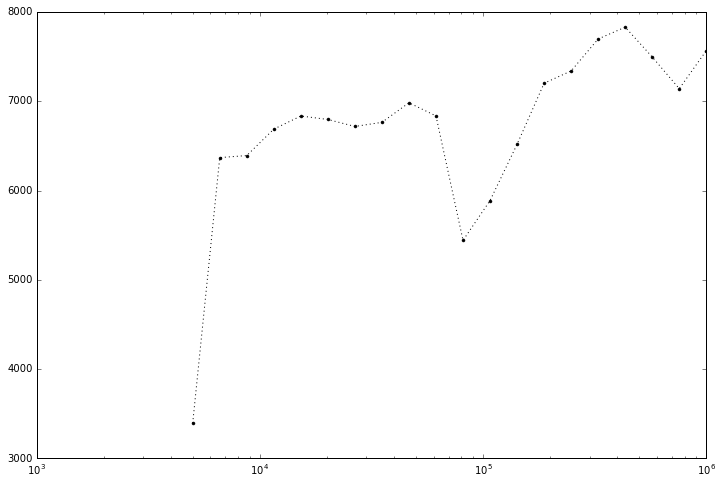

In [91]:
t,o = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\6-17-16\Nabond ND on CPW 5mW scan 1 Dot 3 5mW T1 0.4V ',
         r'C:\Users\Ouyang Group\Documents\Data\6-17-16\Nabond ND on CPW 5mW scan 1 Dot 3 5mW T1 0.4V  Pulse Seq - Copy')
plt.semilogx(t,o,'k.:')

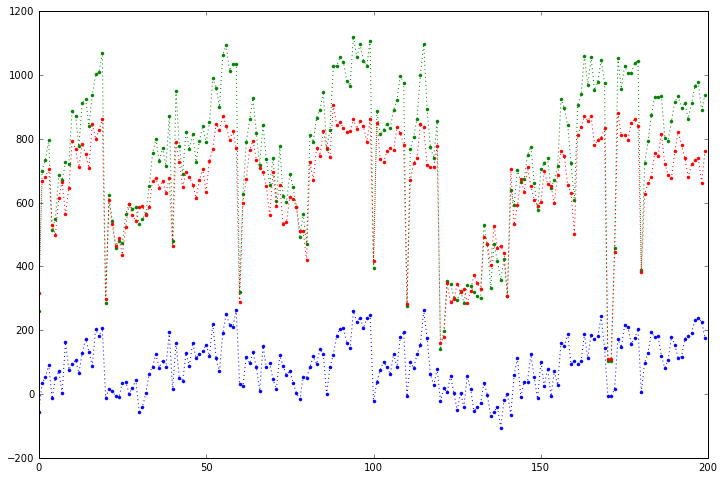

In [100]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\6-17-16\Nabond ND on CPW 5mW scan 1 Dot 3 5mW T1 0.4V')
plt.plot(t[:,0]-t[:,1],'.:')
plt.plot(t,'.:')

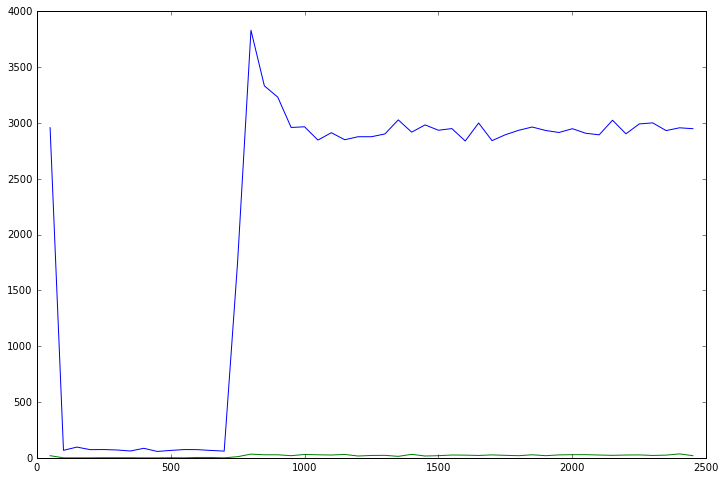

In [119]:

t = np.arange(50,2500,50)
o = NV.EPR_Test(r'C:\Users\Ouyang Group\Documents\Data\6-17-16\Nabond ND on CPW 5mW test pulse 1',t)
plt.plot(t,o)

o2 = NV.EPR_Test(r'C:\Users\Ouyang Group\Documents\Data\6-17-16\Nabond ND on CPW 5mW test pulse 2',t)
plt.plot(t,o2)

In [110]:
reload(NV)

<module 'NV' from 'NV.pyc'>

In [5]:
def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))

[  4.25645838e+01   1.00000000e-01   2.00000000e+02   7.98826177e+00
   9.68386920e+04]


C:\Users\Ouyang Group\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


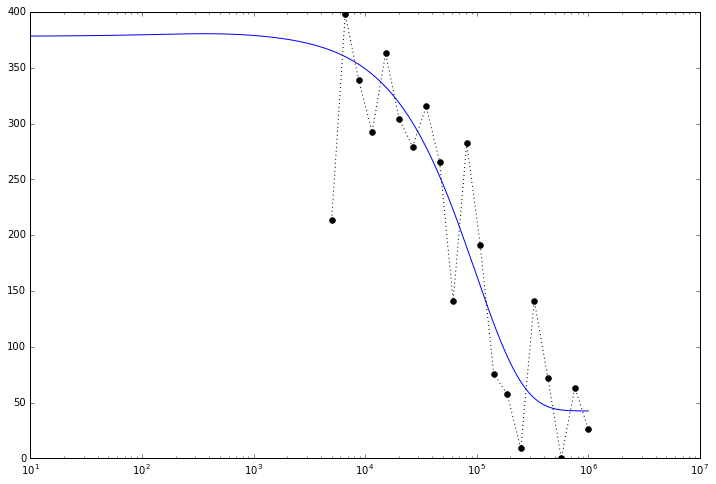

In [6]:
time,T0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\6-17-16\Nabond ND on CPW 5mW scan 1 x149 y107 5mW T1 0.4V  ',
         r'C:\Users\Ouyang Group\Documents\Data\6-17-16\Nabond ND on CPW 5mW scan 1 Dot 3 5mW T1 0.4V  Pulse Seq - Copy')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')